### INF 510 Fall 2019 Final Project Submission

1. **The names of team member(s)**:

    Yifan_Li

2.	**How to run your code (what command-line switches they are, what happens when you invoke the code, etc.)**

    This project requires the following packages:
    - pandas, argparse, seaborn, matplotlib, json, os, sys, Counter numpy, requests and beautifulsoup
   
    To run this project, make sure the above packages are installed, and then simply clone the repo at https://github.com/Jinhong1003/inf510_project and execute this notebook.
    
    I have three parts in my code.
    When we use -source=remote, this code will get the UK region name and the average economic income level of the region from the first webpage, then all city names and the corresponding latitude and longitude from the second webpage, and finally the corresponding latitude and longitude crime from the API Number, type of crime in 2017.. In the end, it will store it to csv.file.

    When we use the -source=test, this part is only for test, I only collect two months in 2017, so the data can be download in 5 minutes.

    When we use the -source=local,we will read the csv file that we store when -source=temote, then clean the csv file. Finally, we process the cleaned data and do visualization. By some picture we get from visualize data we can get result.

3.	**Any major “gotchas” to the code (i.e. things that don’t work, go slowly, could be improved, etc.)**
    
    When I first load data, this code will spend much time more than 15 minutes, and some time we cannot get crime data of the certain month in 2017 from the API.

4.  **Anything else you feel is relevant to the grading of your project your project.**

    In this project, I collected the crime records of England in each month of 2017 according to different regions, and made statistics on the total number of crimes and types of crimes. Then I collected the average income of each region in this project. Then i can get totol crime rate of every region and result of relationship between crime rate and different types of crime. In the end, I show the result by visualization.
    
    According to requirements of this project, I store data to csv file, and the data that I get from API is very big, so csv file is more convenient for me to down load and process when I want to analyze it.And when -source=local, we clear the data and analyze all the clearned data.

5. **What did you set out to study?  (i.e. what was the point of your project?  This should be close to your Milestone 1 assignment, but if you switched gears or changed things, note it here.)**

    My project is to explore the relationship between income levels and crime rates. In the original idea (mailstone 1), I want to explored the relationship between the number of crimes, the number of each type of crime, the local average income level, and the population. 
    
    Later, I found that there must be a positive correlation between the number of crimes and the population. So i modified the target, I changed the purpose of this project to explore the relationship between the total crime rate, the crime rate of each type and the local average income level.

6. **What did you Discover/what were your conclusions (i.e. what were your findings?  Were your original assumptions confirmed, etc.?)**

    According to the visualization, the result shows that the crime rate in North East, West Midlands, East of England is higher than other regions.
    
    Second, the other visualized picture show us that the average income have big relationship with anti-social-behaviour crime rate, burglary crime rate, criminal-damage-arson crime rate, drugs crime rate, other-theft crime rate, possession-of-weapons crime rate, public-order crime rate, shoplifting crime rate, other-crime crime rate. And by the result, we can easily find that the region has higher average income, this region will have lower rates of these crimes.
    
    Then, we can find the average income has small influence in bicycle-theft crime rate,vehicle-crime crime rate,robbery crime rate,theft-from-the-person crime rate.

7. **What difficulties did you have in completing the project?**  

    First, when i choose 9 regions in England, I find that it is hard to get the total crime number of entire region, I only can get the total crime number of certain city.
    I only can find the data of average income of every regions, and cannot find average income of every cities.
    So, I choose one important city of every region and use average income of regions to get final result.
    
    Second, when i college data from API, I always find sometime I cannot get the data of certain month, but if I do it again, the data is available. Therefore, I use try...except function to do it and solve this problem.
    
    Another problem is when I want to use csv.file in jupyter notebook, the path is wrong, so i use os package to get the path and use it.

8. **What skills did you wish you had while you were doing the project?**

    When i do this project, I hope that I can have more knowledge about data analysis and forecasting, as well as data visualization technology, can analyze and process the data smoothly, and clearly show them.

9. **What would you do “next” to expand or augment the project?**

    If i had to continue this project, i will college more information about every cities, such as Education level, unemployment rate, proportion of homeless population...Then I can use it as factors and get a classifier, when i want to know the crime rate of a city, i can put these predictors in to this classifier(or model) to get possible crime rate of this city.
    
    Second, i will add number of cities to analyze, if i have much more data, I can ignore some outlier data which will influenc the accuracy of results.

In [1]:
import argparse
import requests
from bs4 import BeautifulSoup
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import json
import sys
import os
sys.path.append('./src')
import YIFAN_LI_hw5


I want to find the relationship between the economic level and crime rate in England. First, I need to get the population data and economic level data of each area, then get the latitude and longitude of each area, and finally get all the records and data of crimes in 2017 according to the latitude and longitude of the area. Finally get the results through data processing and visualization. Through this model, the crime rate in this area can be judged by the local economic level in the future.

In [4]:
latitude_longitude=YIFAN_LI_hw5.get_local_latitude_longitude()
latitude_longitude

,city name,latitude,longitude
0,"York, North Yorkshire, the UK",53.958332,-1.080278
1,"Worcester, Worcestershire, the UK",52.192001,-2.220000
2,"Winchester, Hampshire, the UK",51.063202,-1.308000
3,"Wells, South West England, the UK",51.209000,-2.647000
4,"Wakefield, West Yorkshire, the UK",53.680000,-1.490000
...,...,...,...
80,"Hull, the UK",53.747372,-0.338653
81,"Plymouth, UK",50.376289,-4.143841
82,"Haverhill, Suffolk, UK",52.080875,0.444517
83,"Frankton, Warwickshire, UK",52.328415,-1.377561


In [5]:
pop_GDHI_df=YIFAN_LI_hw5.get_local_pop_GDHI_df()
pop_GDHI_df

,region name,GDHI
0,North East,15595
1,North West,16761
2,Yorkshire and The Humber,16365
3,East Midlands,17042
4,West Midlands,16766
5,East of England,20275
6,South East,22375
7,South West,19077
8,London,27151


In [6]:
instance_df=YIFAN_LI_hw5.get_local_instance_df()
instance_df

,crime type,region,data
0,anti-social-behaviour,North East,2017-01
1,anti-social-behaviour,North East,2017-01
2,anti-social-behaviour,North East,2017-01
3,anti-social-behaviour,North East,2017-01
4,anti-social-behaviour,North East,2017-01
...,...,...,...
184668,other-crime,London,2017-12
184669,other-crime,London,2017-12
184670,other-crime,London,2017-12
184671,other-crime,London,2017-12


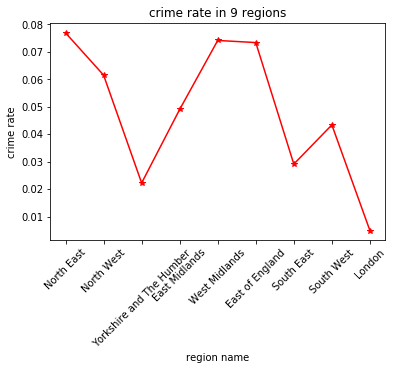

/Users/liyifan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


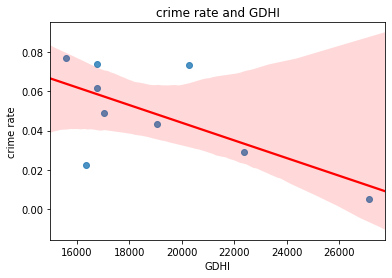

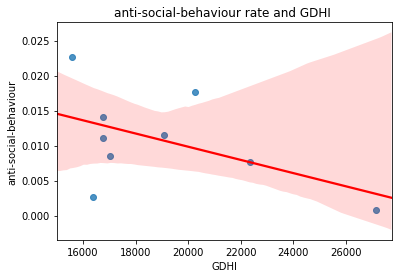

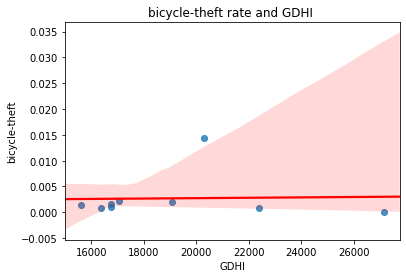

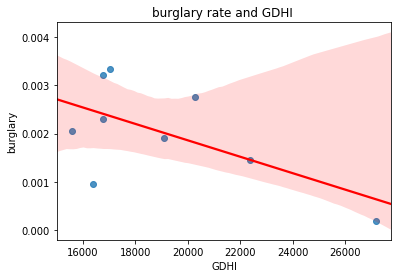

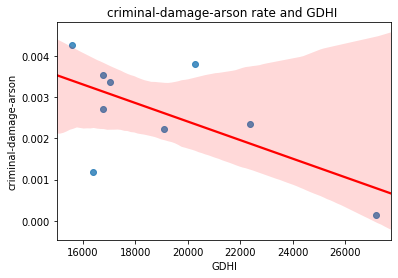

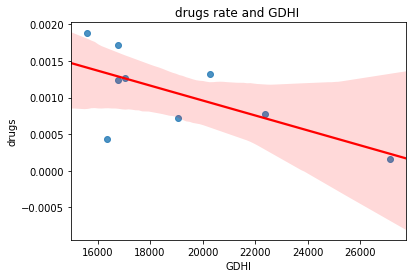

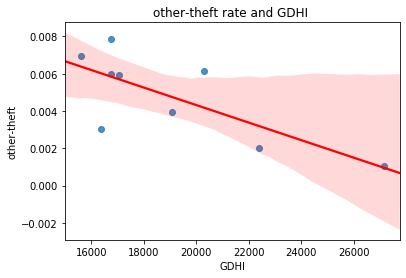

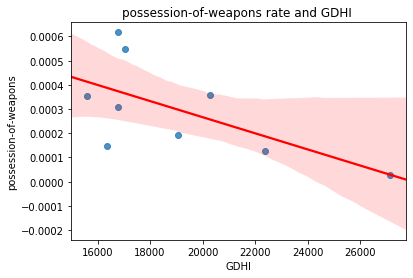

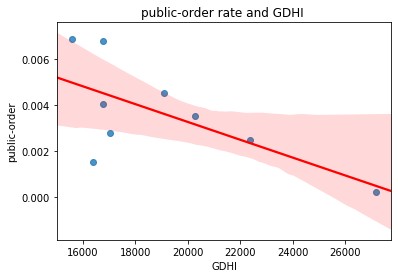

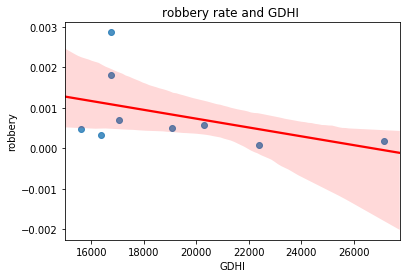

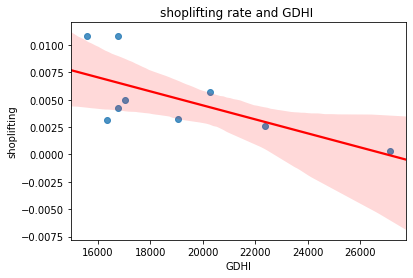

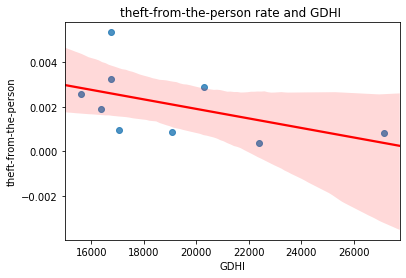

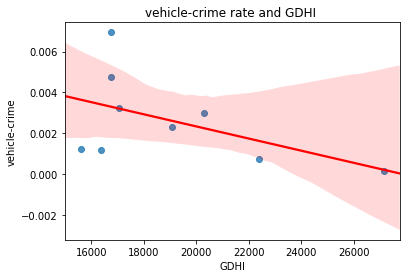

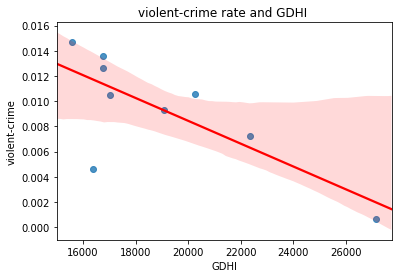

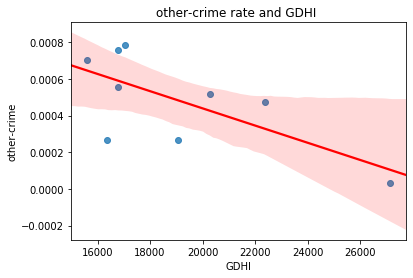

In [3]:
YIFAN_LI_hw5.data_process(latitude_longitude,pop_GDHI_df,instance_df)

**first picture**

From the first picture:
    we can see the crime rate in every region, the London and North East have low crime rate, and North East, West Midlands, East of England have large crime rate.
    
    
  

**second picture**

For the second picture, we can easily find the relationship between crime rate and average income. when the average income increase, the number of crime rate will decrease.

**other picture**

For the other picures, We can find the relationship between each crime type and the average income level, so that we can judge which crime types and income levels are more closely related. In the above figure, when the slope of the linear model is larger, it means that the average income level has a higher weight in this type of crime.

Therefore, it shows that the average income have big relationship with anti-social-behaviour crime rate, burglary crime rate, criminal-damage-arson crime rate, drugs crime rate, other-theft crime rate, possession-of-weapons crime rate, public-order crime rate, shoplifting crime rate, and other-crime crime rate. 

For bicycle-theft crime rate,vehicle-crime crime rate,robbery crime rate,theft-from-the-person crime rate, the average income have very small or have no influence.